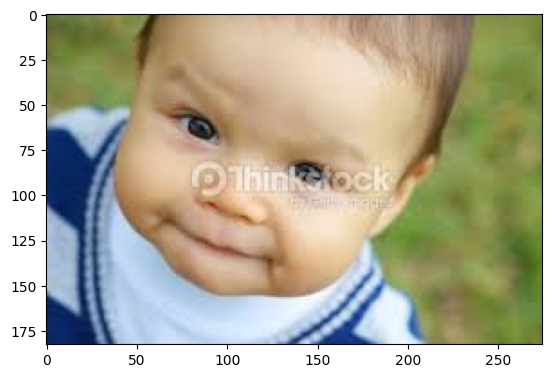

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_1 = cv2.imread(
    'E:\\Pycharm\\Age-Detection-Using-Neural-Network\\DATA\\UTKFace\\part1\\part1\\1_0_0_20161219140623097.jpg')

plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))


In [2]:
import torch

print(torch.cuda.is_available())


True


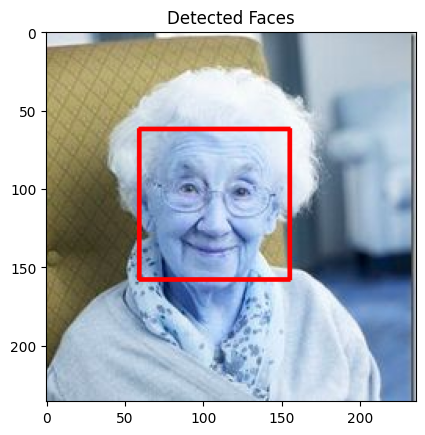

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load model Haar Cascade có sẵn
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Đọc ảnh
img = cv2.imread('DATA/UTKFace/part1/part1/96_1_0_20170110182019881.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Vẽ hình chữ nhật quanh mặt
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Hiển thị kết quả
plt.imshow(img)
plt.title('Detected Faces')
plt.show()

In [26]:
import cv2
import os

# Load model Haar Cascade có sẵn
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Đọc ảnh
img = cv2.imread('DATA/UTKFace/part1/part1/96_1_0_20170110182019881.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Cắt và lưu khuôn mặt
for i, (x, y, w, h) in enumerate(faces):
    # Cắt khuôn mặt từ ảnh gốc
    face = img[y:y + h, x:x + w]

    # Tạo tên file mới với "face" ở cuối
    base_filename = 'UTKFace_small\DATA_FACE\\23_1_1_20170114030249007.jpg'
    filename, ext = os.path.splitext(base_filename)
    new_filename = f"{filename}_face{ext}"

    # Lưu ảnh khuôn mặt vào file
    cv2.imwrite(new_filename, face)
    print(f"Khuôn mặt đã lưu tại: {new_filename}")

#

Khuôn mặt đã lưu tại: UTKFace_small\DATA_FACE\23_1_1_20170114030249007_face.jpg


In [ ]:
import cv2
import os

# Load Haar Cascade model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

root_dir = 'E:/Pycharm/Age-Detection-Using-Neural-Network'

with open(os.path.join(root_dir, 'UTKFace_small/UTKFace_small.txt'), 'r') as f:
    image_paths = [line.strip().replace('\\', '/') for line in f if line.strip()]

output_dir = 'DATA_FACE'
os.makedirs(output_dir, exist_ok=True)

for image in image_paths:
    img_path = os.path.join(root_dir, image)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for i, (x, y, w, h) in enumerate(faces):
        if w < 72 or h < 72:
            print(f"[BỎ QUA] anh nhỏ hơn 72x72: {img_path}")
            continue

        face = img[y:y + h, x:x + w]

        base_name = os.path.basename(image)
        filename, ext = os.path.splitext(base_name)
        new_filename = os.path.join(output_dir, f"{filename}_face{i}{ext}")

        cv2.imwrite(new_filename, face)
        print(f"{new_filename} is saved.")
